# Data Analysis with Python



## Objectives

### SALAMI LUKMAN BAYONLE

Setup
* Import libraries:

In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y
#!pip install imblearn

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

<h2 id="problem_statement">1. Problem Statement</h2>

Uncover the factors that affect car prices. This is a fictional data set created by IBM data scientists.

### What is the major factors affecting car prices

To predict car prices

### Import the dataset

This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE</a>.


In [161]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [162]:
df.tail()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,19,25,22625.0,12.368421,Medium,0,1


In [163]:
df.shape

(201, 29)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [165]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [166]:
df.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [167]:
# Get all null values and duplicate rows
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [168]:
df = df.dropna()    # Dropping the missing values.
df.count()

symboling            196
normalized-losses    196
make                 196
aspiration           196
num-of-doors         196
body-style           196
drive-wheels         196
engine-location      196
wheel-base           196
length               196
width                196
height               196
curb-weight          196
engine-type          196
num-of-cylinders     196
engine-size          196
fuel-system          196
bore                 196
stroke               196
compression-ratio    196
horsepower           196
peak-rpm             196
city-mpg             196
highway-mpg          196
price                196
city-L/100km         196
horsepower-binned    196
diesel               196
gas                  196
dtype: int64

No missing values after dropping

### Numeric Distribution

In [169]:
numCols = df.select_dtypes([np.number]).columns.drop("price")
numCols

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'city-L/100km', 'diesel', 'gas'],
      dtype='object')

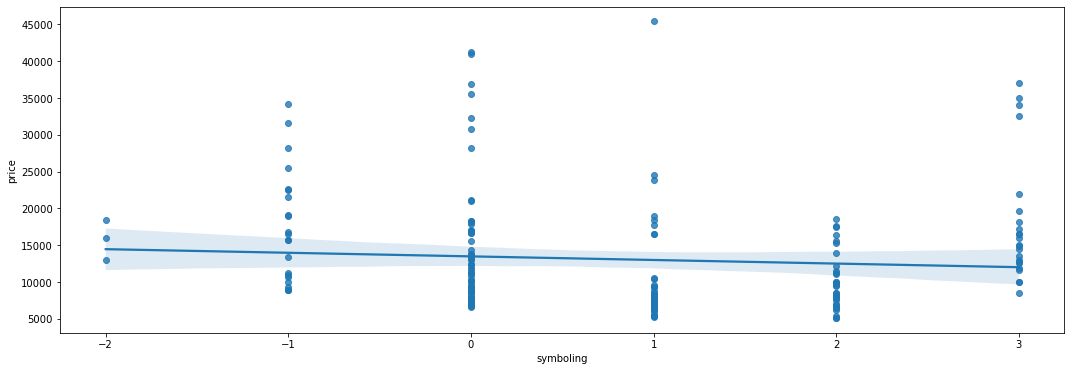

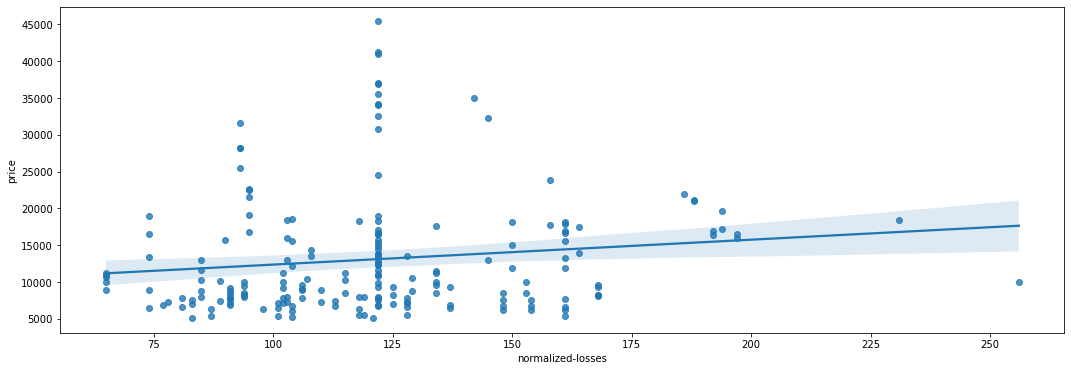

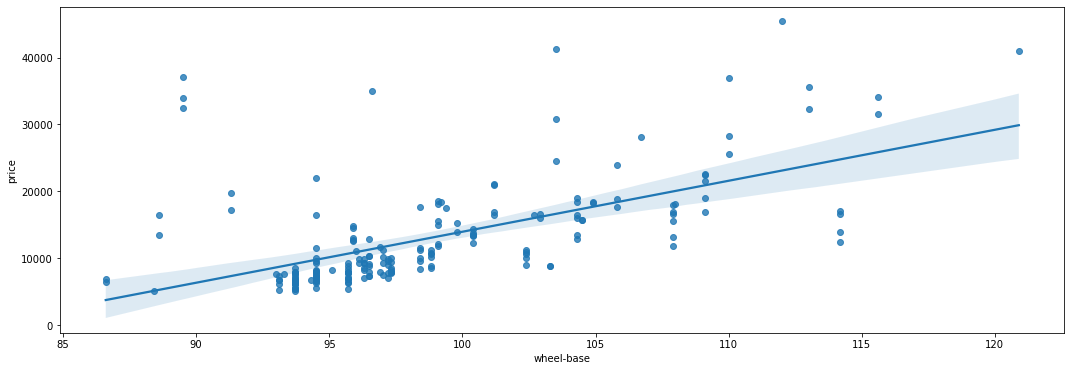

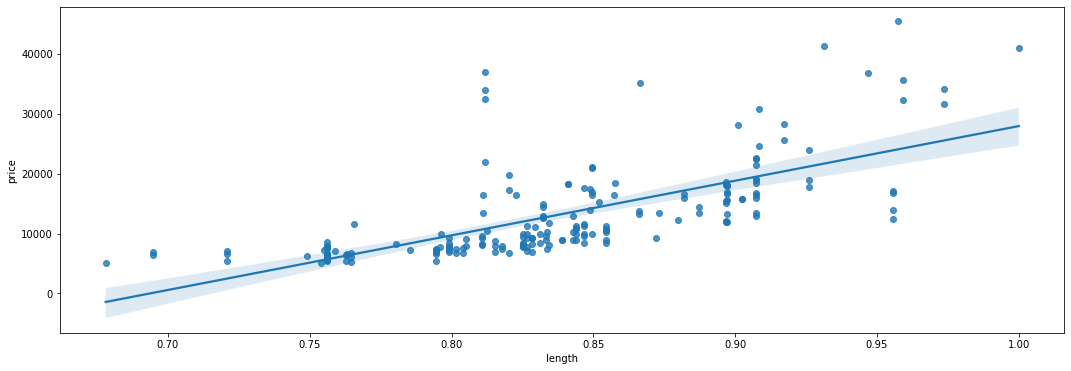

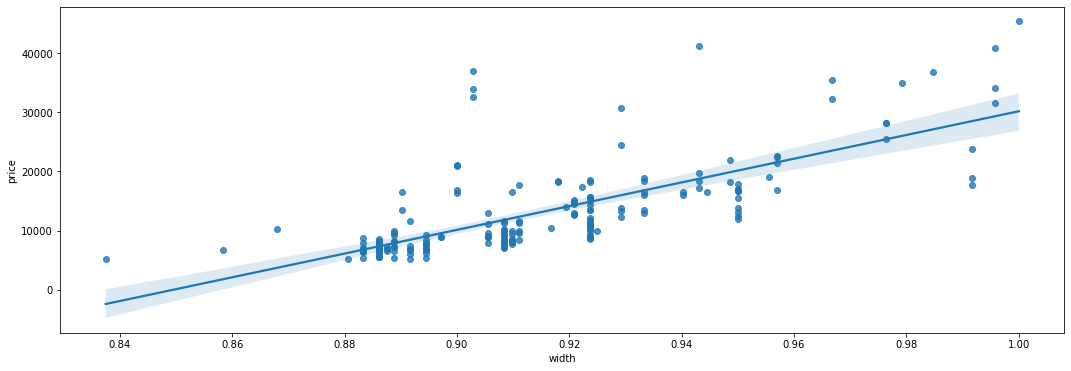

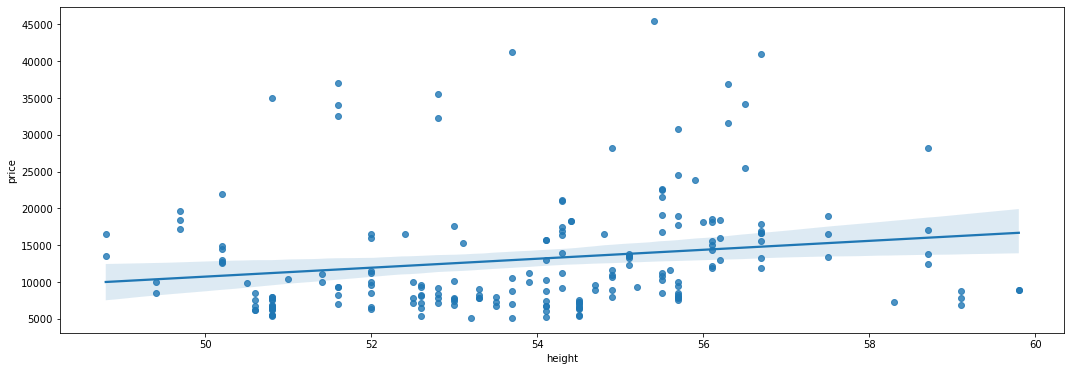

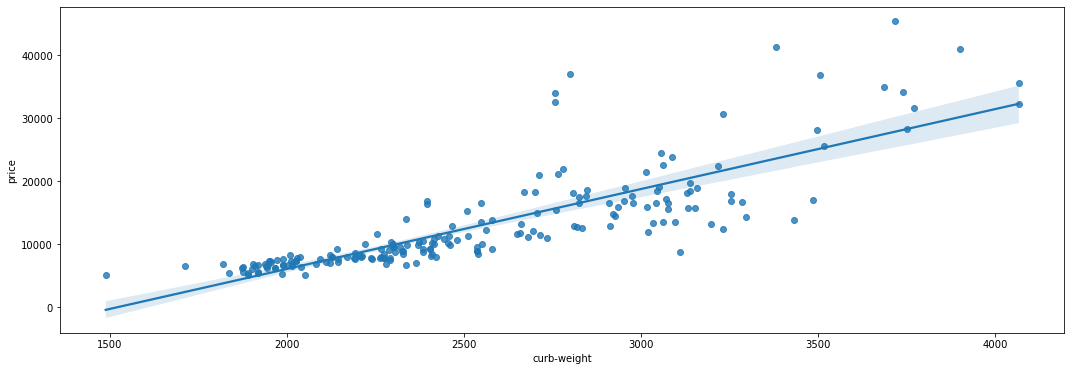

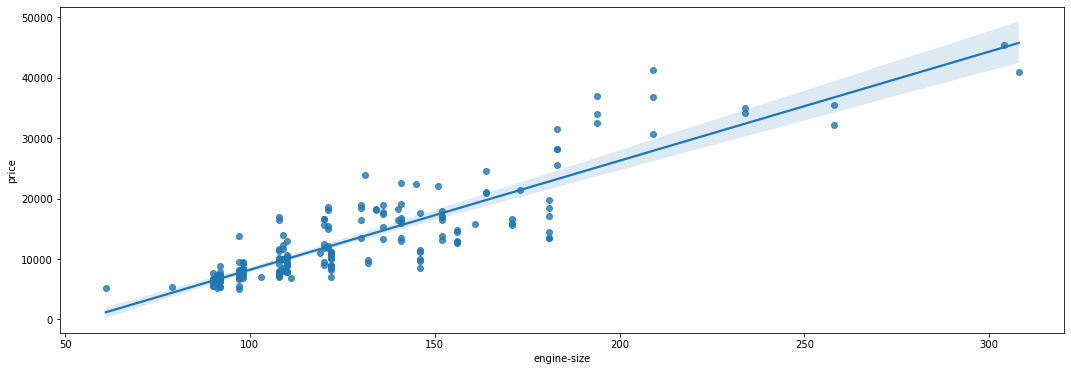

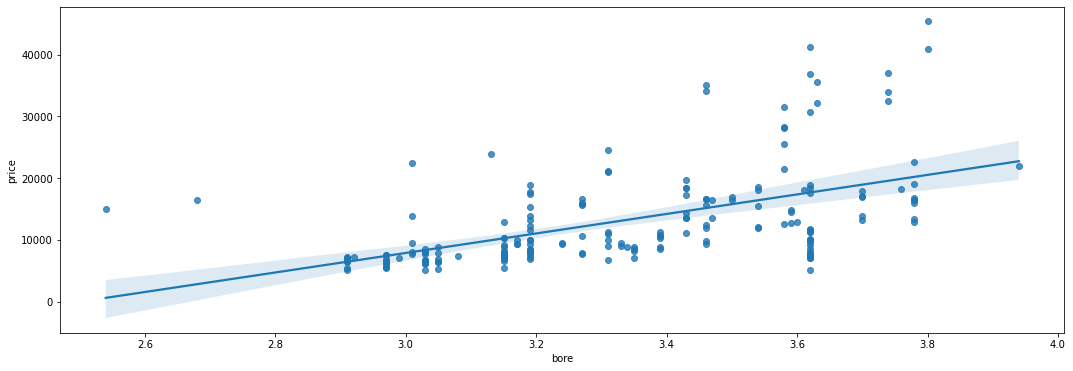

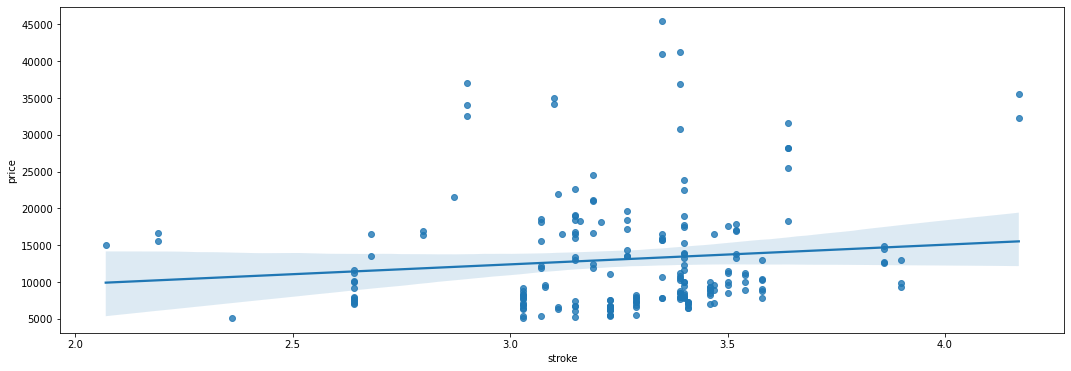

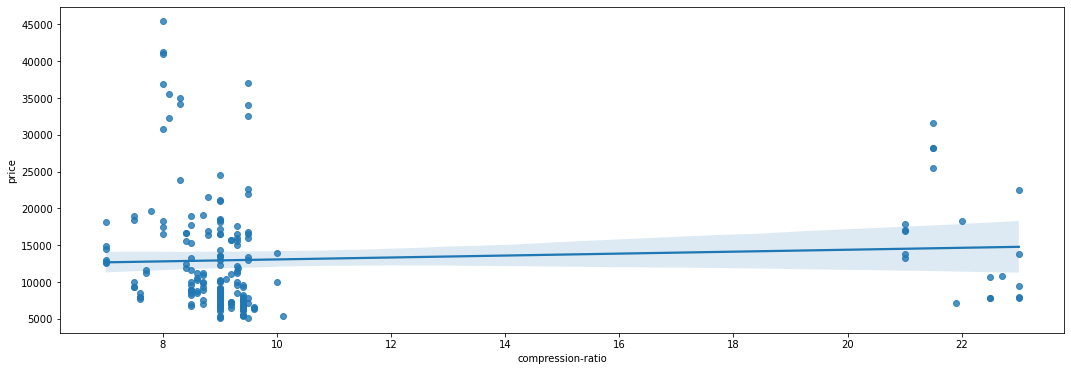

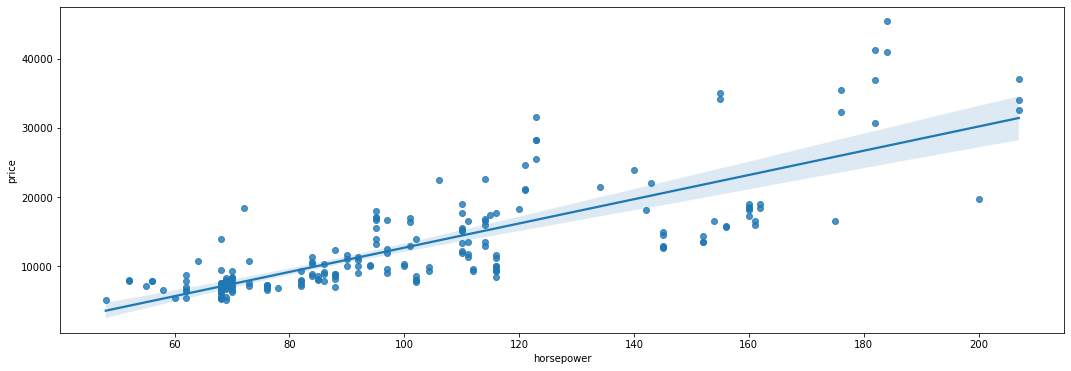

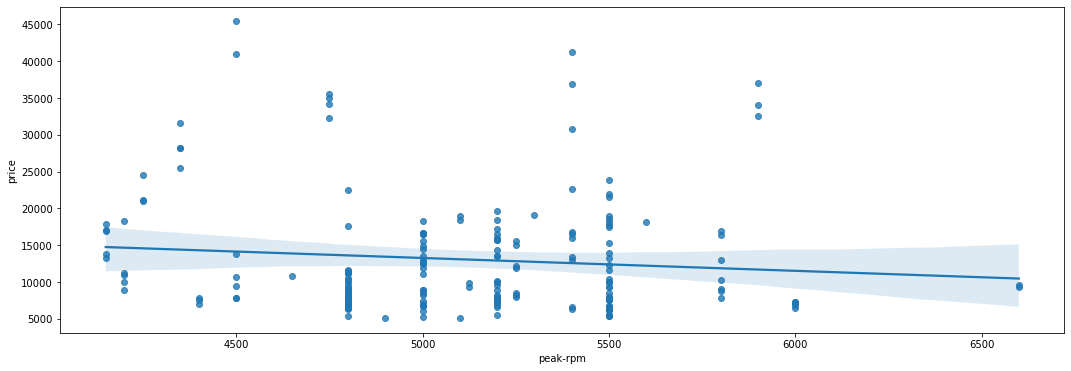

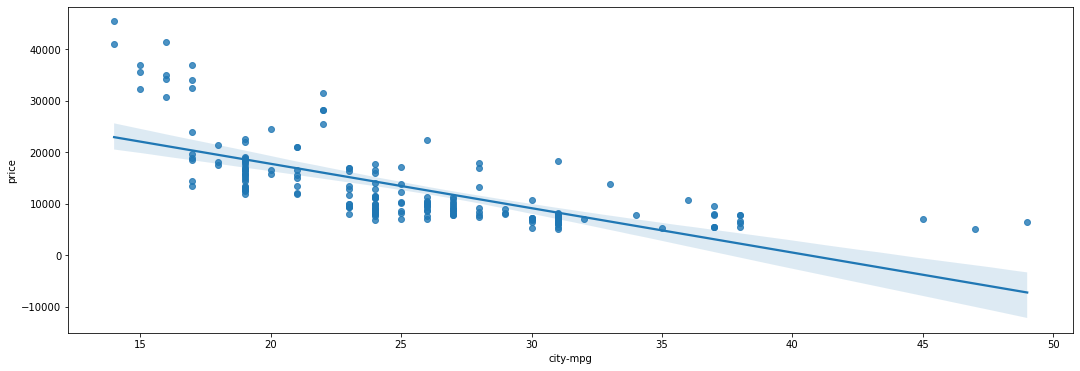

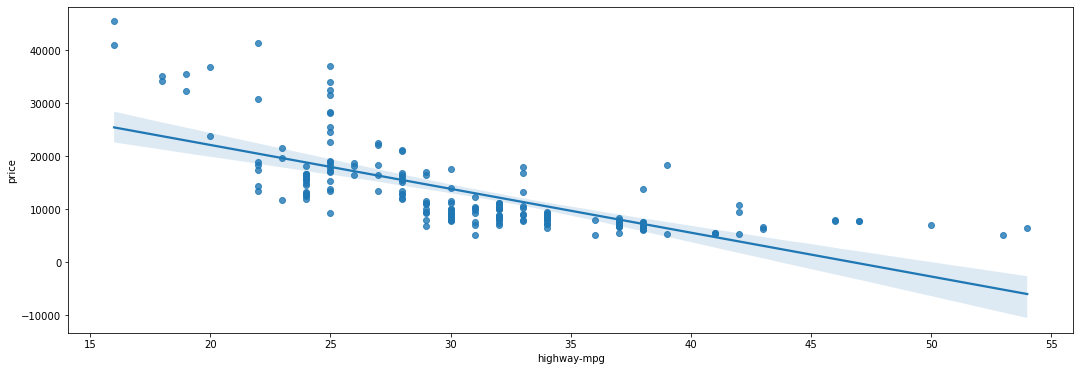

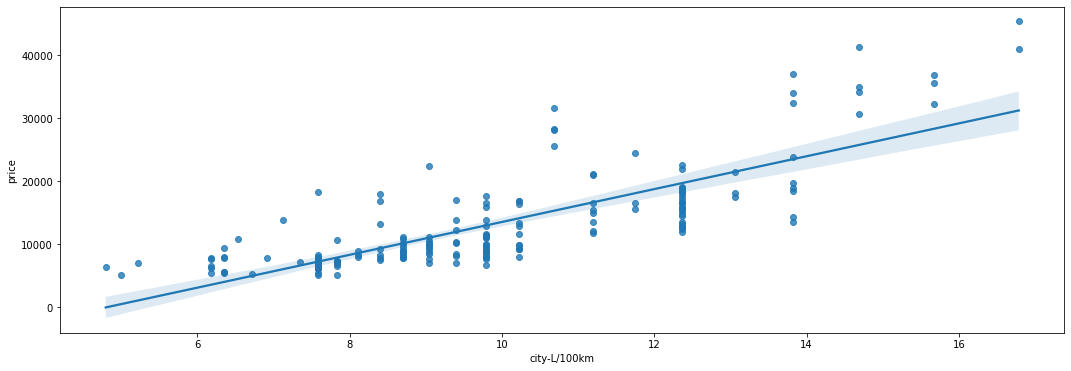

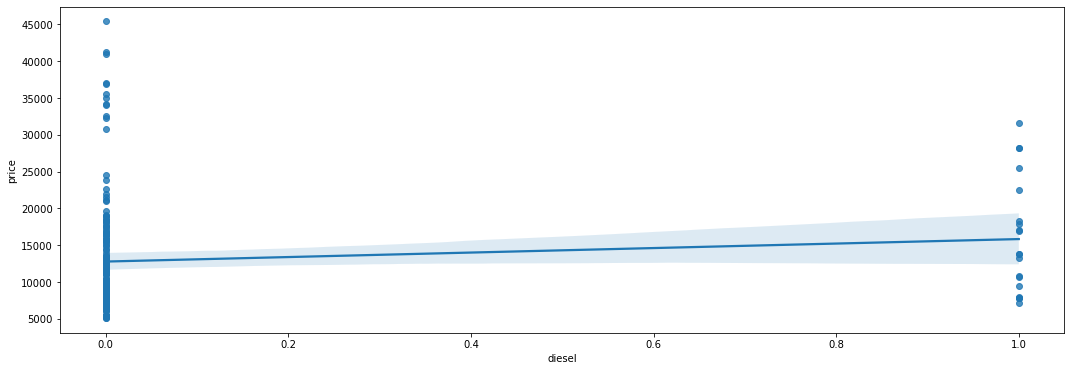

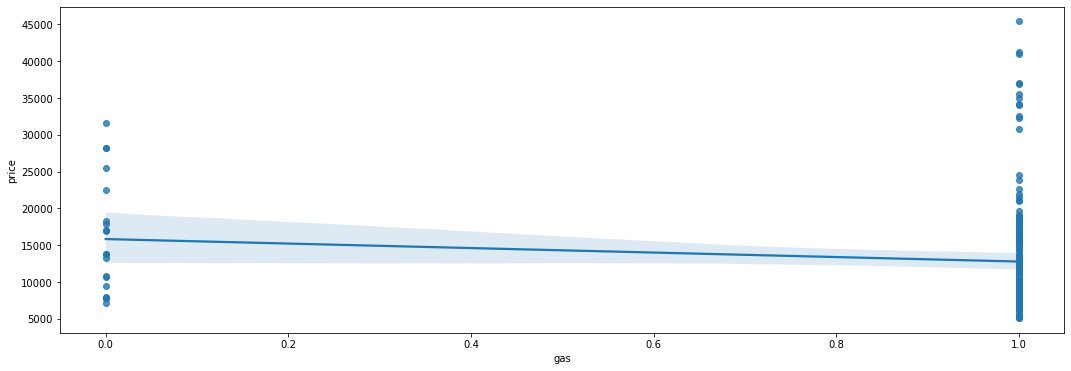

In [170]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.regplot(x=col, y="price", data=df)
    plt.show()

### High Correlation Characteristics
* wheel-base	
* length	
* width		
* curb-weight	
* engine-size	
* bore			
* horsepower		
* city-mpg	
* highway-mpg		
* city-L/100km

### Categorical Count Plot

In [171]:
objCols = df.select_dtypes(['object']).columns
objCols

Index(['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'horsepower-binned'],
      dtype='object')

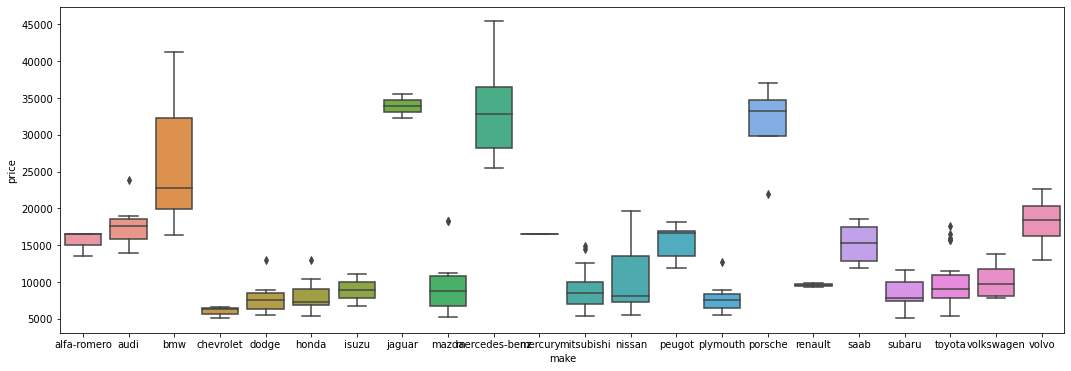

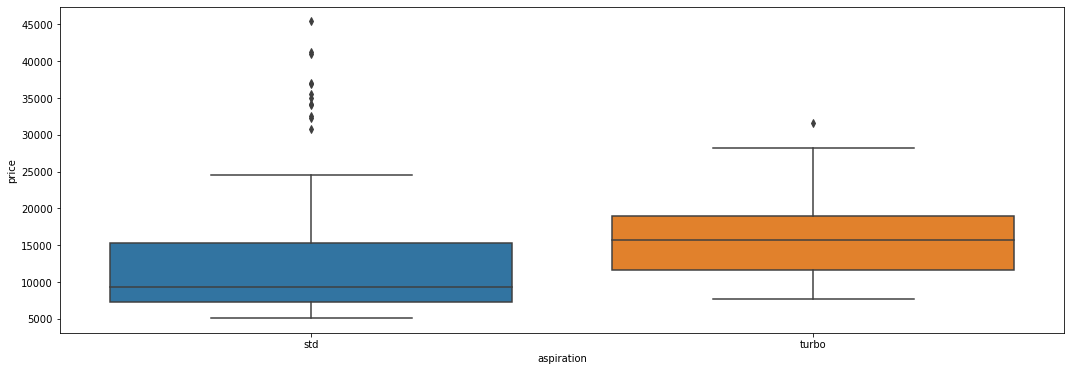

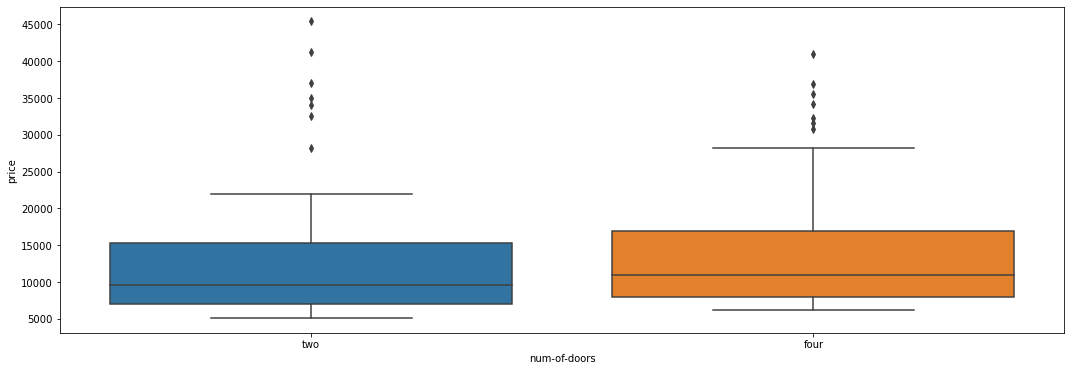

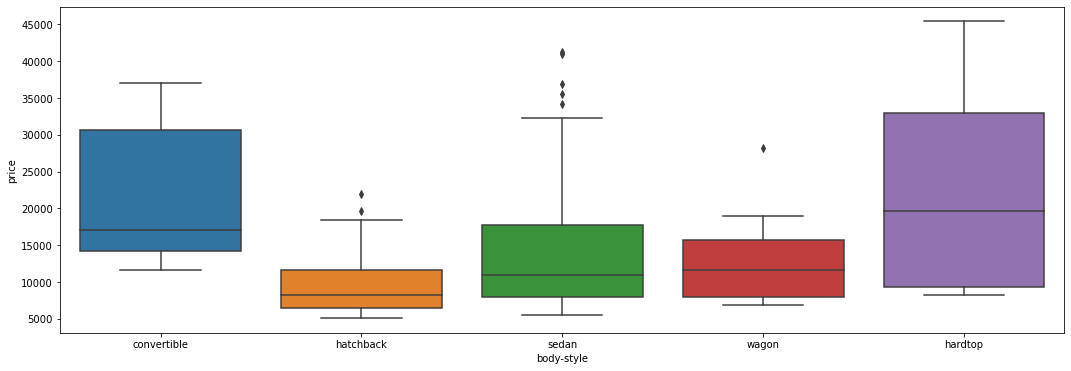

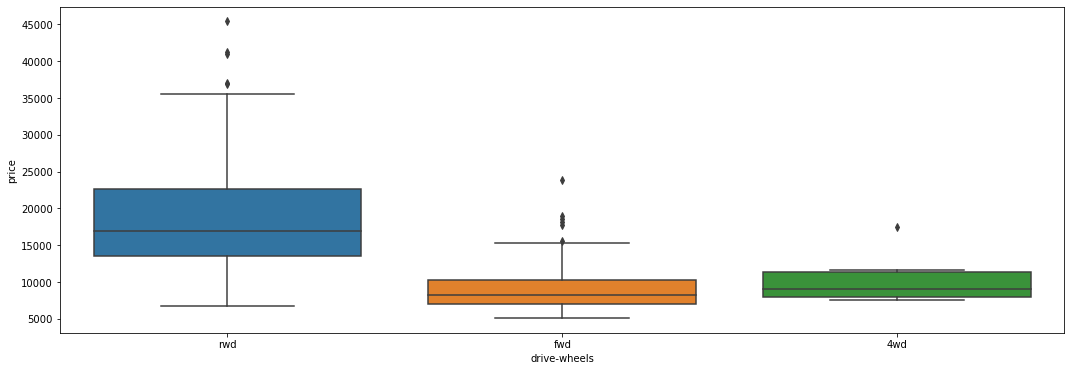

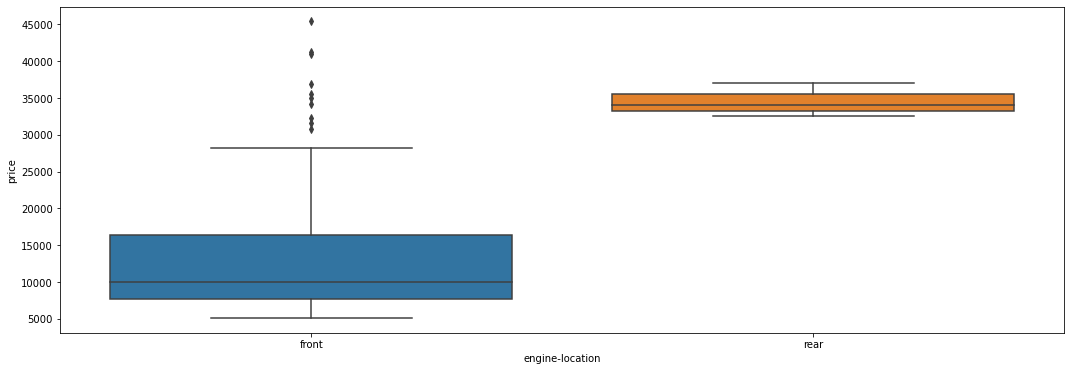

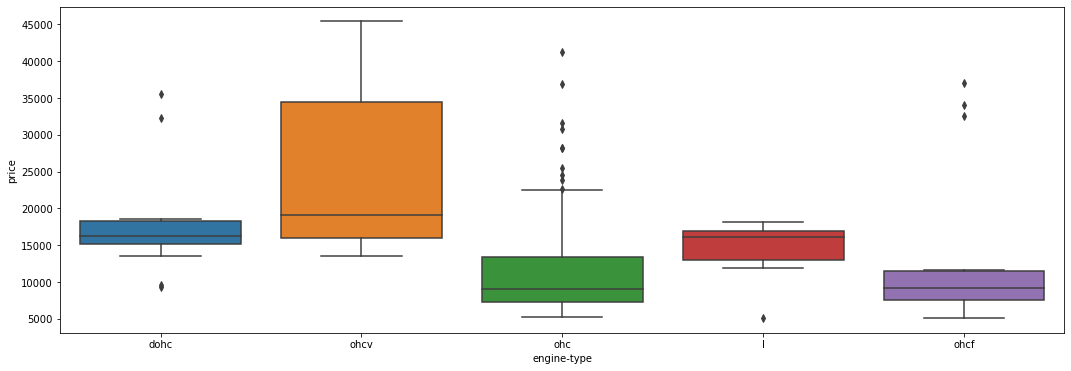

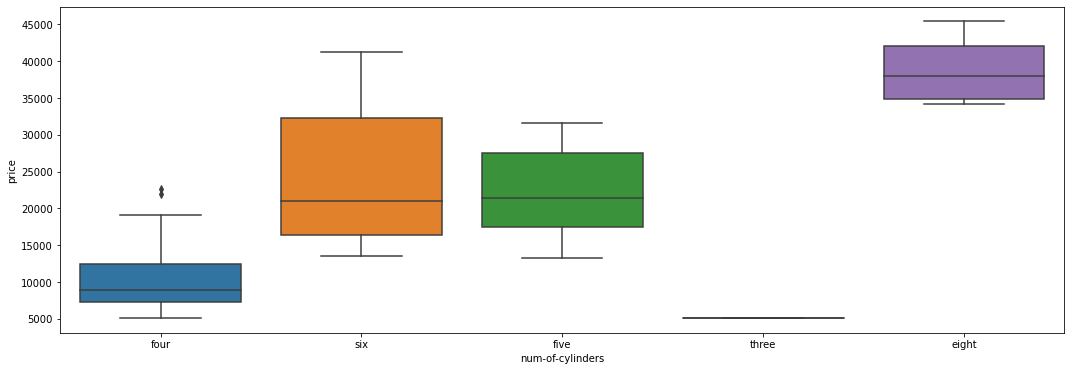

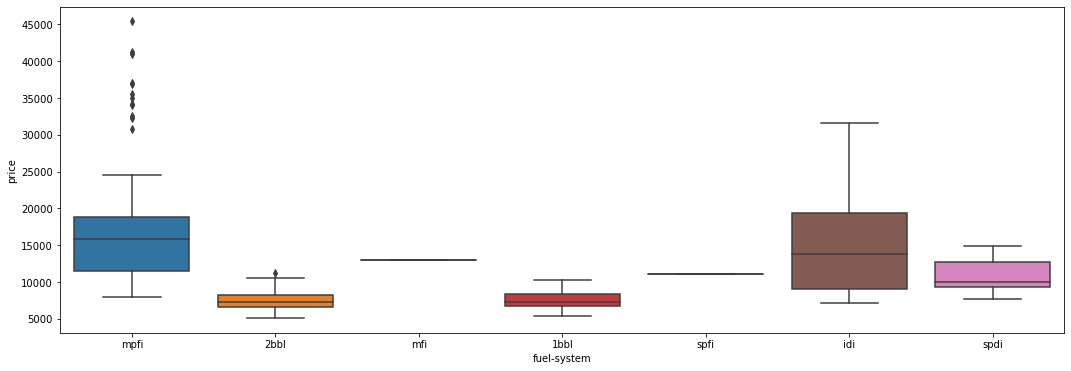

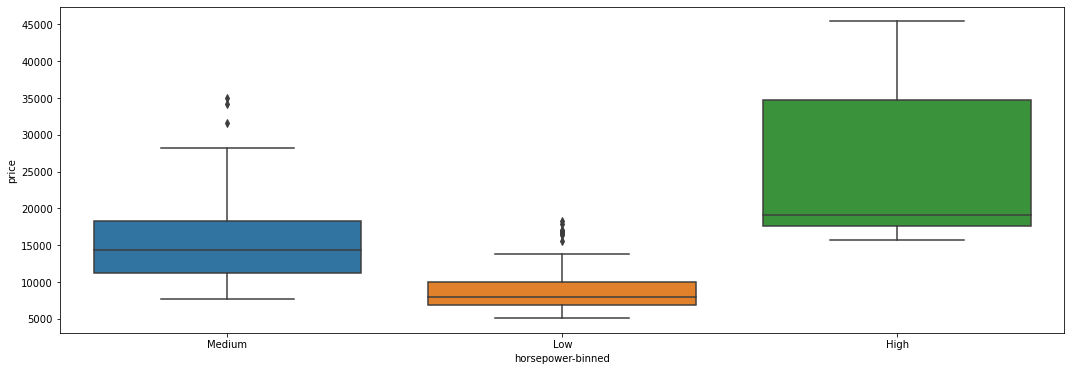

In [172]:
for col in objCols:
    plt.figure(figsize=(18,6))
    sns.boxplot(x=col, y="price", data=df)
    plt.show()

Here we see that the distribution of price between listed below, are distinct enough as a potential good predictor of price.
* drive-wheels
* engine-location
* num-of-cylinders
* horsepower-binned

### Dropping irrelevant columns

In [173]:
df1 = df.drop(['symboling', 'normalized-losses', 'aspiration', 'num-of-doors', 'body-style', 'height','engine-type', 'fuel-system', 'stroke', 'compression-ratio', 'peak-rpm', 'diesel', 'gas', 'fuel-system'], axis=1)
df1.head()

,make,drive-wheels,engine-location,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned
0,alfa-romero,rwd,front,88.6,0.811148,0.890278,2548,four,130,3.47,111.0,21,27,13495.0,11.190476,Medium
1,alfa-romero,rwd,front,88.6,0.811148,0.890278,2548,four,130,3.47,111.0,21,27,16500.0,11.190476,Medium
2,alfa-romero,rwd,front,94.5,0.822681,0.909722,2823,six,152,2.68,154.0,19,26,16500.0,12.368421,Medium
3,audi,fwd,front,99.8,0.848630,0.919444,2337,four,109,3.19,102.0,24,30,13950.0,9.791667,Medium
4,audi,4wd,front,99.4,0.848630,0.922222,2824,five,136,3.19,115.0,18,22,17450.0,13.055556,Medium


In [174]:
df1 = df1.rename(columns={"drive-wheels": "drive_wheels", "engine-location": "engine_location", "wheel-base": "wheel_base", "num-of-cylinders": "num_of_cylinders","engine-size": "engine_size", "city-mpg": "city_mpg", "highway-mpg": "highway_mpg", "city-L/100km": "city_L_100km", "horsepower-binned": "horsepower_binned" })
df1.head(5)

,make,drive_wheels,engine_location,wheel_base,length,width,curb-weight,num_of_cylinders,engine_size,bore,horsepower,city_mpg,highway_mpg,price,city_L_100km,horsepower_binned
0,alfa-romero,rwd,front,88.6,0.811148,0.890278,2548,four,130,3.47,111.0,21,27,13495.0,11.190476,Medium
1,alfa-romero,rwd,front,88.6,0.811148,0.890278,2548,four,130,3.47,111.0,21,27,16500.0,11.190476,Medium
2,alfa-romero,rwd,front,94.5,0.822681,0.909722,2823,six,152,2.68,154.0,19,26,16500.0,12.368421,Medium
3,audi,fwd,front,99.8,0.848630,0.919444,2337,four,109,3.19,102.0,24,30,13950.0,9.791667,Medium
4,audi,4wd,front,99.4,0.848630,0.922222,2824,five,136,3.19,115.0,18,22,17450.0,13.055556,Medium


In [175]:
df1.corr()

,wheel_base,length,width,curb-weight,engine_size,bore,horsepower,city_mpg,highway_mpg,price,city_L_100km
wheel_base,1.000000,0.876945,0.821427,0.790205,0.592517,0.493941,0.381984,-0.496565,-0.566948,0.591956,0.517050
length,0.876945,1.000000,0.857249,0.882091,0.698626,0.608496,0.583073,-0.686142,-0.715124,0.689466,0.690579
width,0.821427,0.857249,1.000000,0.862835,0.739543,0.543859,0.604099,-0.639692,-0.684550,0.744176,0.685663
curb-weight,0.790205,0.882091,0.862835,1.000000,0.858968,0.646918,0.750749,-0.766146,-0.808146,0.828483,0.809512
engine_size,0.592517,0.698626,0.739543,0.858968,1.000000,0.601384,0.825377,-0.712693,-0.734062,0.889265,0.814696
bore,0.493941,0.608496,0.543859,0.646918,0.601384,1.000000,0.579114,-0.591597,-0.598455,0.544375,0.574286
horsepower,0.381984,0.583073,0.604099,0.750749,0.825377,0.579114,1.000000,-0.838567,-0.815187,0.802040,0.904611
city_mpg,-0.496565,-0.686142,-0.639692,-0.766146,-0.712693,-0.591597,-0.838567,1.000000,0.971016,-0.692550,-0.951563
highway_mpg,-0.566948,-0.715124,-0.684550,-0.808146,-0.734062,-0.598455,-0.815187,0.971016,1.000000,-0.707466,-0.931565
price,0.591956,0.689466,0.744176,0.828483,0.889265,0.544375,0.802040,-0.692550,-0.707466,1.000000,0.803669


### Handle Outlier

#### Scatter & Box plot

In [176]:
numCols1 = df1.select_dtypes([np.number]).columns.drop("price")
numCols1

Index(['wheel_base', 'length', 'width', 'curb-weight', 'engine_size', 'bore',
       'horsepower', 'city_mpg', 'highway_mpg', 'city_L_100km'],
      dtype='object')

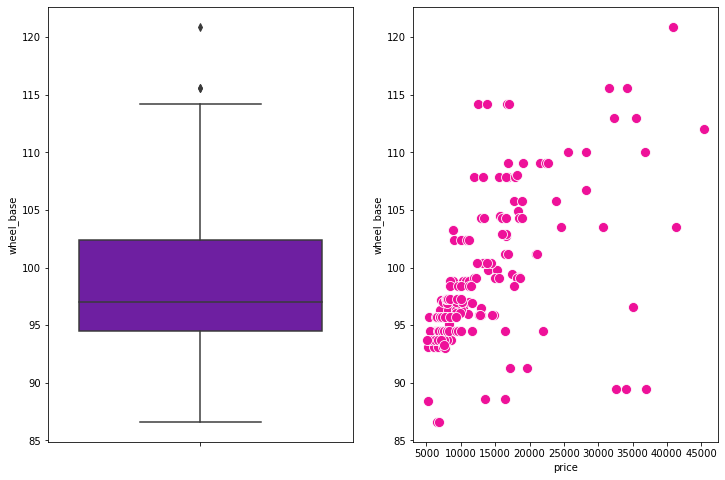

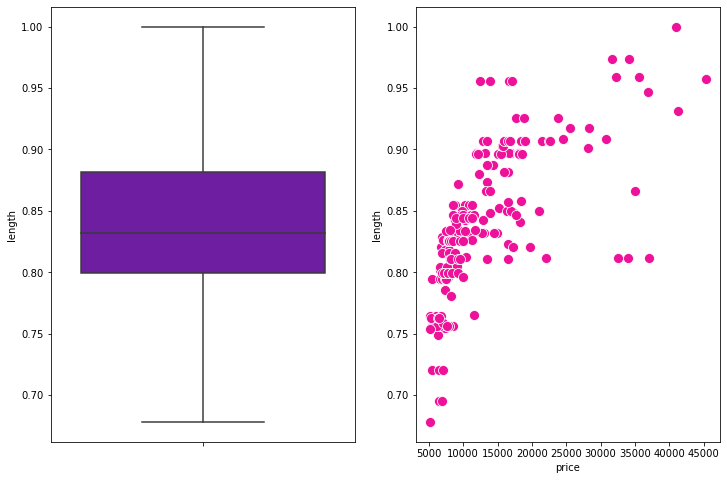

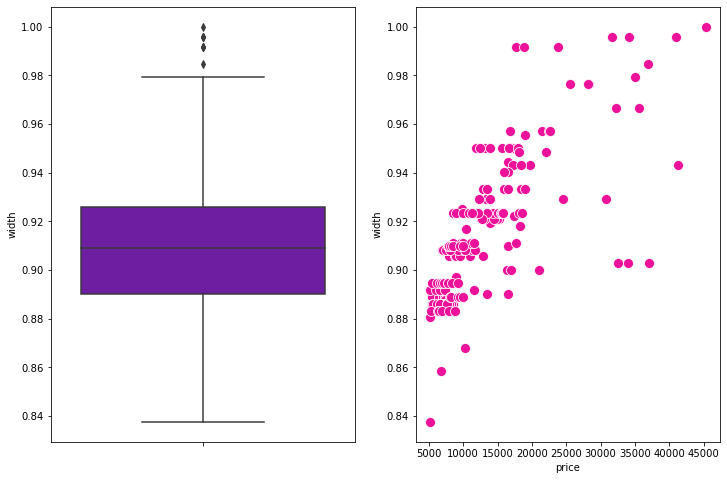

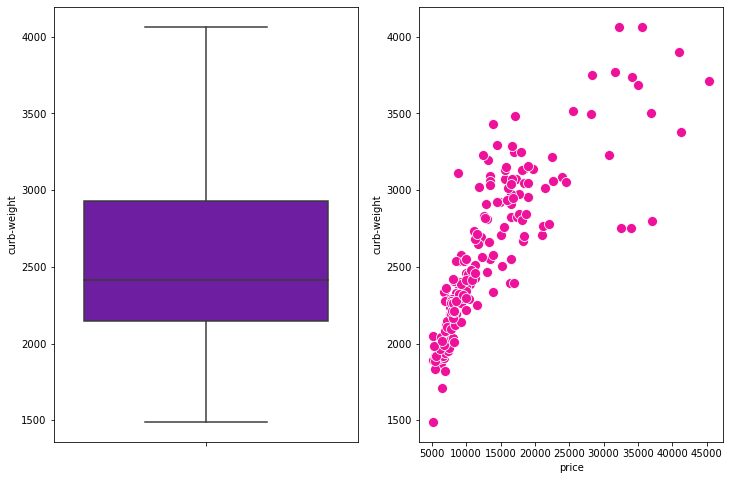

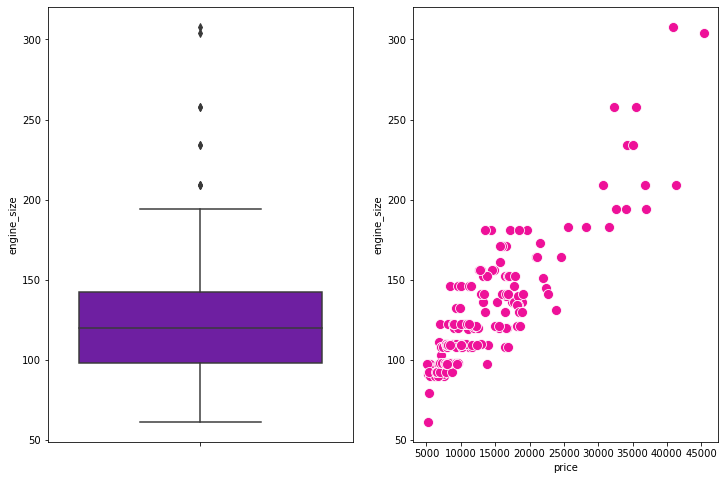

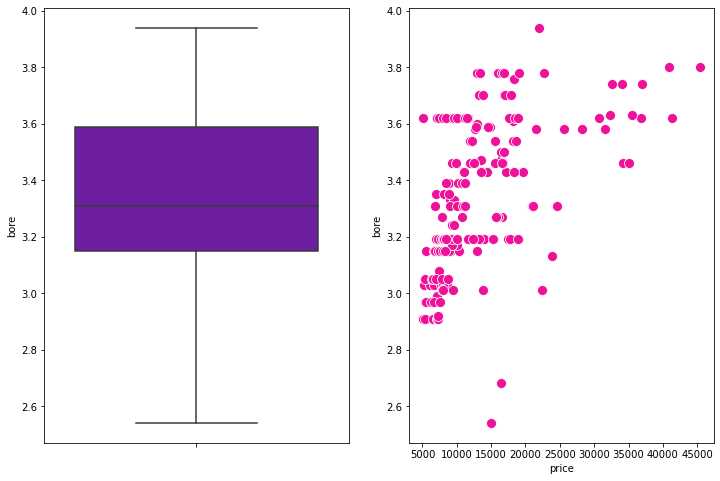

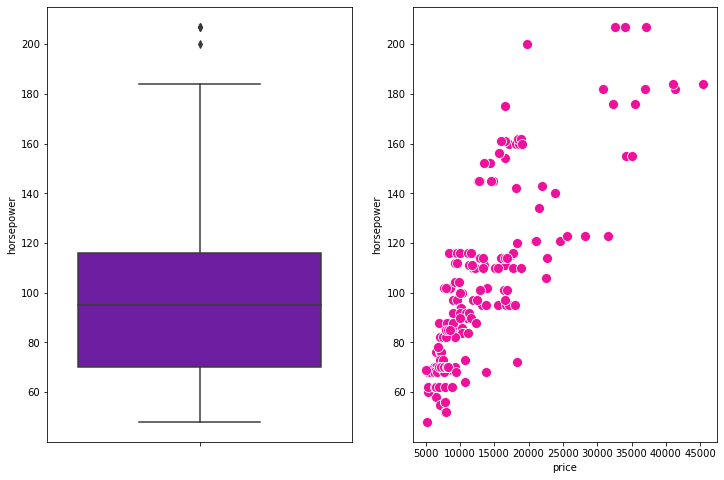

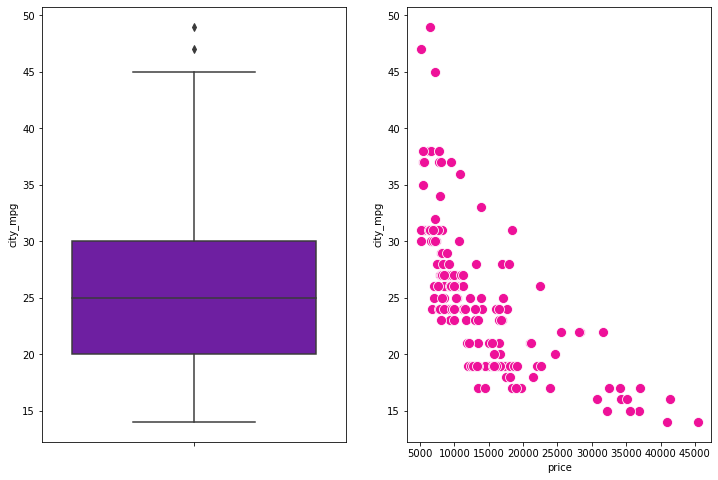

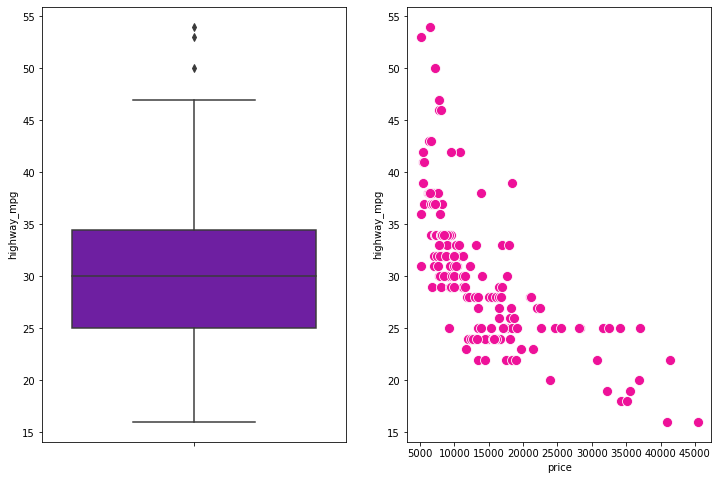

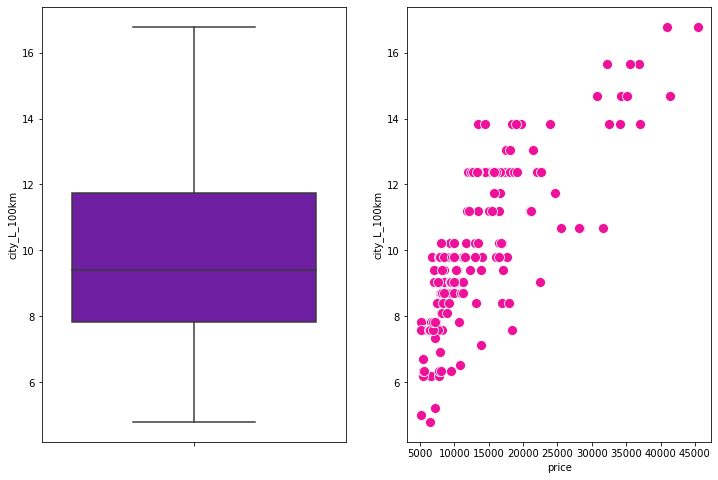

In [177]:
for col in numCols1:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=df1, y=col, ax=ax[0], color='#7209b7')
    sns.scatterplot(data=df1,x = 'price', s = 100, y=col, ax=ax[1], color ='#ee1199')
    plt.show()

#### No significant outliers 

### Encode categorical values

In [178]:
df2 = df1.copy()

In [179]:
make_le = LabelEncoder()
drive_wheels_le = LabelEncoder()
engine_location_le = LabelEncoder()
num_of_cylinders_le = LabelEncoder()
horsepower_binned_le = LabelEncoder()

In [180]:
df2['make'] = make_le.fit_transform(df1['make'])
df2['drive_wheels'] = drive_wheels_le.fit_transform(df1['drive_wheels'])
df2['engine_location'] = engine_location_le.fit_transform(df1['engine_location'])
df2['num_of_cylinders'] = num_of_cylinders_le.fit_transform(df1['num_of_cylinders'])
df2['horsepower_binned'] = horsepower_binned_le.fit_transform(df1['horsepower_binned'])

### Correlation

<AxesSubplot:>

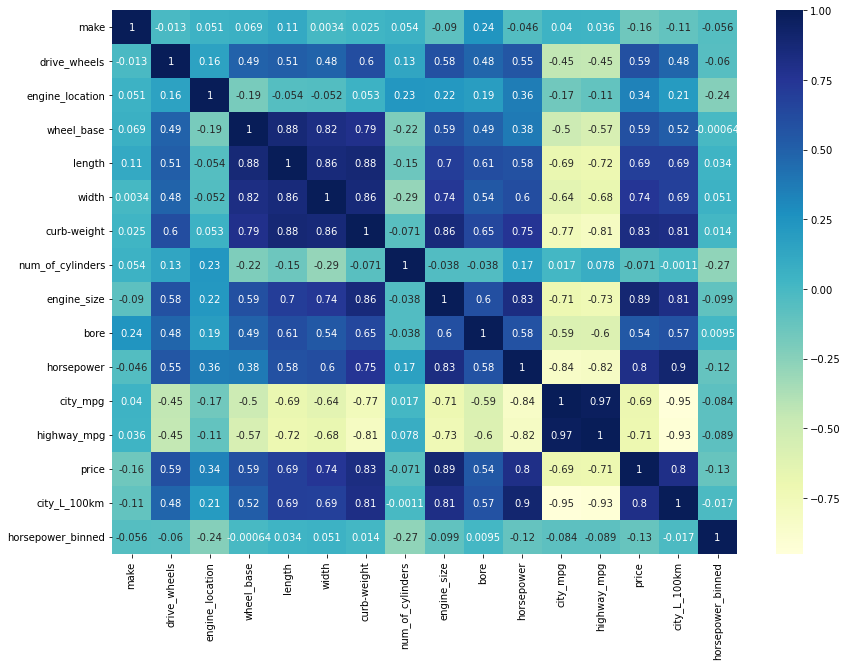

In [181]:
plt.figure(figsize = (14,10))
sns.heatmap(df2.corr() , annot = True , cmap = "YlGnBu")

### Feature Selection
less than 5% not accepted as a feature

In [182]:
round(abs(df2.corr()['price']*100).sort_values(ascending=False), 2)

price                100.00
engine_size           88.93
curb-weight           82.85
city_L_100km          80.37
horsepower            80.20
width                 74.42
highway_mpg           70.75
city_mpg              69.26
length                68.95
drive_wheels          59.49
wheel_base            59.20
bore                  54.44
engine_location       34.02
make                  15.59
horsepower_binned     12.70
num_of_cylinders       7.15
Name: price, dtype: float64

<AxesSubplot:>

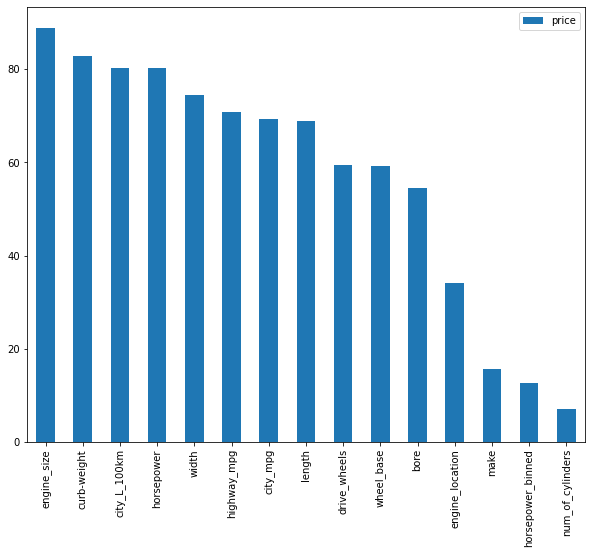

In [183]:
pd.DataFrame(abs(df2.corr()['price'].drop('price')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

In [184]:
mdf = df2
mdf

,make,drive_wheels,engine_location,wheel_base,length,width,curb-weight,num_of_cylinders,engine_size,bore,horsepower,city_mpg,highway_mpg,price,city_L_100km,horsepower_binned
0,0,2,0,88.6,0.811148,0.890278,2548,2,130,3.47,111.0,21,27,13495.0,11.190476,2
1,0,2,0,88.6,0.811148,0.890278,2548,2,130,3.47,111.0,21,27,16500.0,11.190476,2
2,0,2,0,94.5,0.822681,0.909722,2823,3,152,2.68,154.0,19,26,16500.0,12.368421,2
3,1,1,0,99.8,0.848630,0.919444,2337,2,109,3.19,102.0,24,30,13950.0,9.791667,2
4,1,0,0,99.4,0.848630,0.922222,2824,1,136,3.19,115.0,18,22,17450.0,13.055556,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,21,2,0,109.1,0.907256,0.956944,2952,2,141,3.78,114.0,23,28,16845.0,10.217391,2
197,21,2,0,109.1,0.907256,0.955556,3049,2,141,3.78,160.0,19,25,19045.0,12.368421,0
198,21,2,0,109.1,0.907256,0.956944,3012,3,173,3.58,134.0,18,23,21485.0,13.055556,2
199,21,2,0,109.1,0.907256,0.956944,3217,3,145,3.01,106.0,26,27,22470.0,9.038462,2


### Imbalanced data

In [185]:
mdf['price'].value_counts()

8921.0     2
18150.0    2
8845.0     2
7957.0     2
6229.0     2
          ..
6669.0     1
7689.0     1
9959.0     1
8499.0     1
22625.0    1
Name: price, Length: 181, dtype: int64

### Modeling

### 1. Using Linear Regression
* Multiple Linear Regression

In [186]:
# Create the linear regression object
lm = LinearRegression()

In [187]:
X = mdf[["make","drive_wheels","engine_location","wheel_base","length","width","curb-weight","engine_size","bore","horsepower","city_mpg","highway_mpg"]]
Y = mdf[["price"]]

### Lets Create residue plots 
* A good way to visualize the variance of the data
* This helps in selecting the best attributes to use in MLR

In [188]:
numCols2 = X.select_dtypes([np.number])
numCols2

,make,drive_wheels,engine_location,wheel_base,length,width,curb-weight,engine_size,bore,horsepower,city_mpg,highway_mpg
0,0,2,0,88.6,0.811148,0.890278,2548,130,3.47,111.0,21,27
1,0,2,0,88.6,0.811148,0.890278,2548,130,3.47,111.0,21,27
2,0,2,0,94.5,0.822681,0.909722,2823,152,2.68,154.0,19,26
3,1,1,0,99.8,0.848630,0.919444,2337,109,3.19,102.0,24,30
4,1,0,0,99.4,0.848630,0.922222,2824,136,3.19,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...
196,21,2,0,109.1,0.907256,0.956944,2952,141,3.78,114.0,23,28
197,21,2,0,109.1,0.907256,0.955556,3049,141,3.78,160.0,19,25
198,21,2,0,109.1,0.907256,0.956944,3012,173,3.58,134.0,18,23
199,21,2,0,109.1,0.907256,0.956944,3217,145,3.01,106.0,26,27


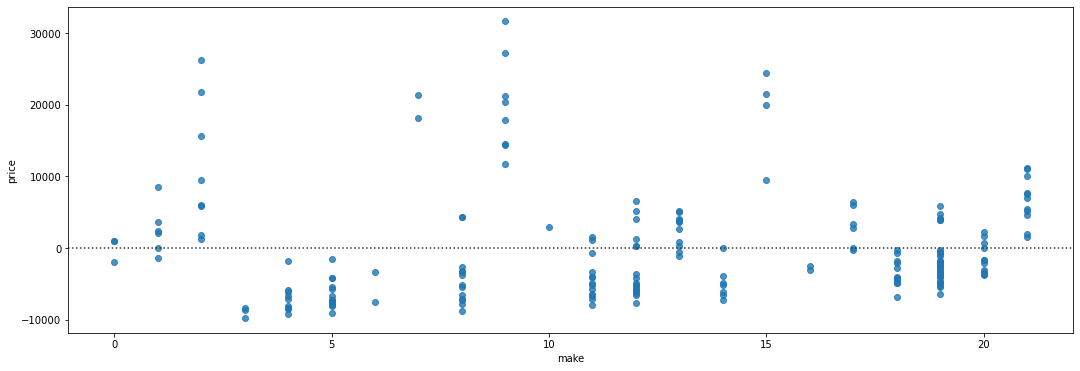

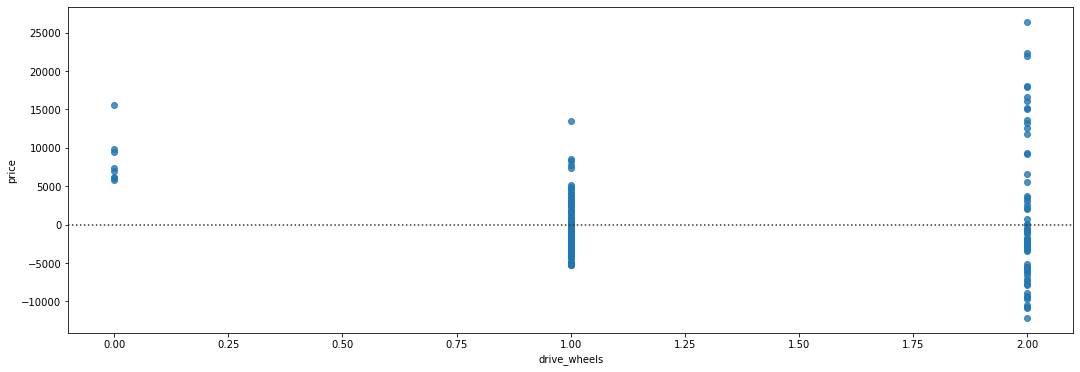

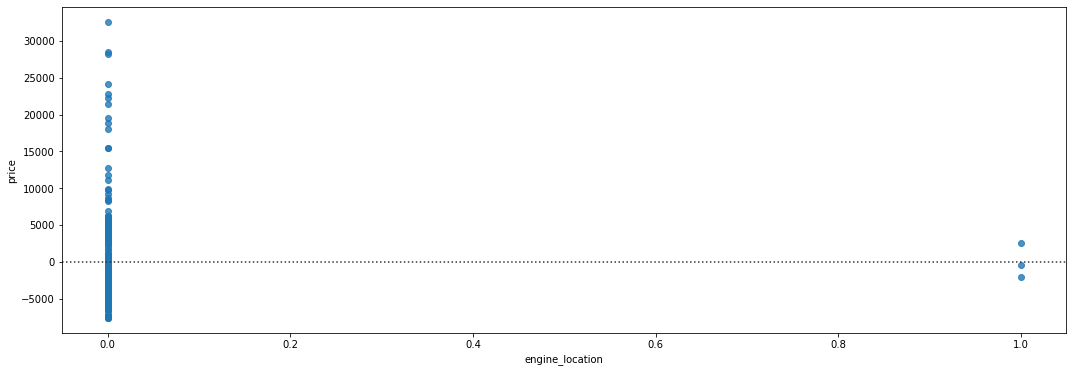

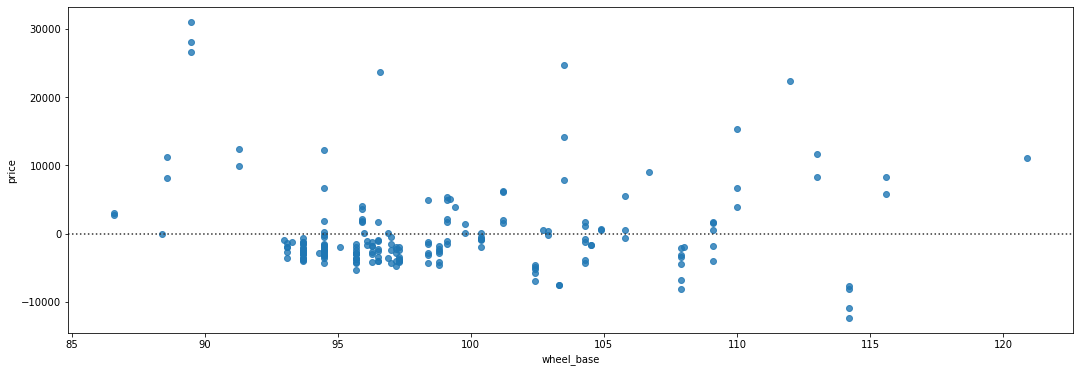

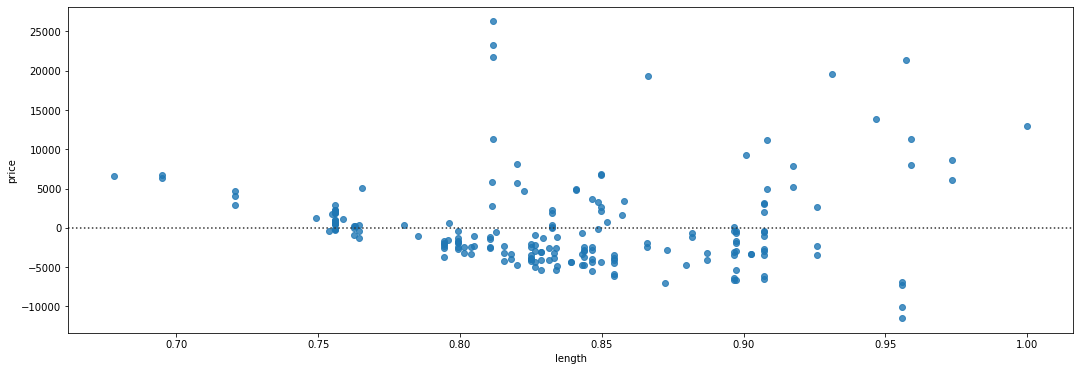

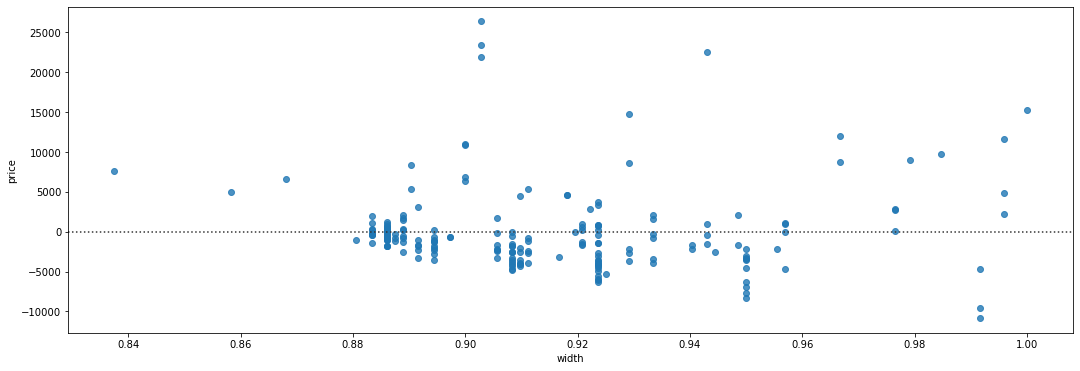

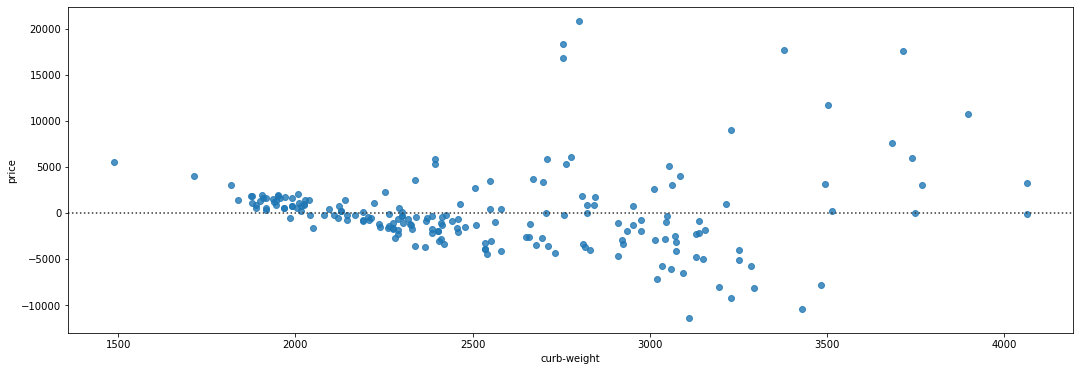

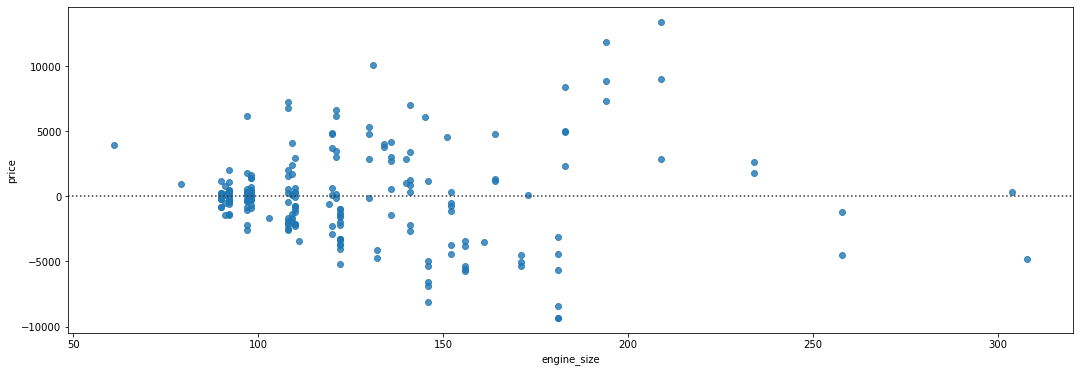

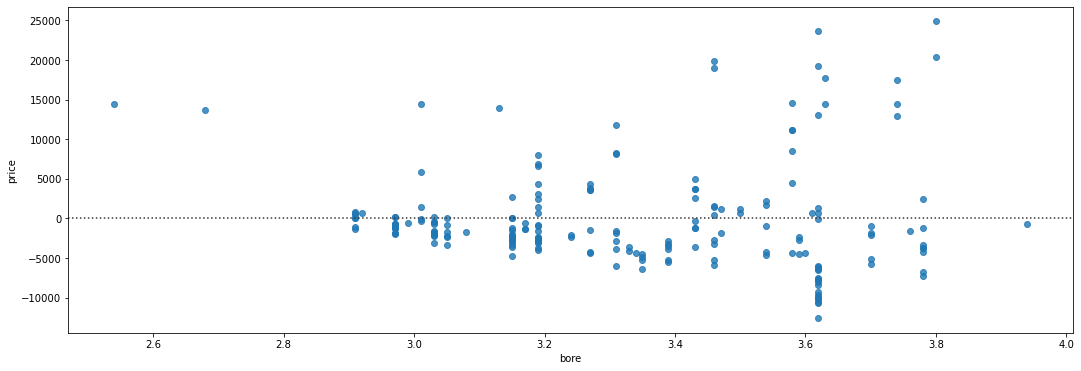

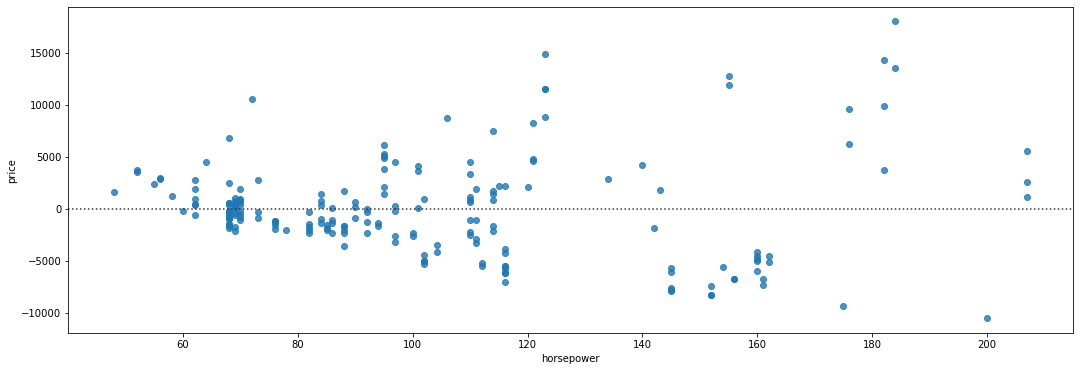

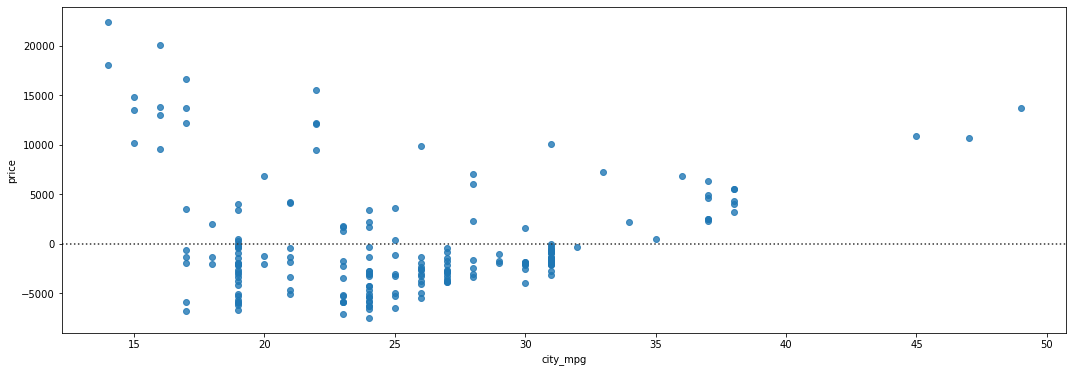

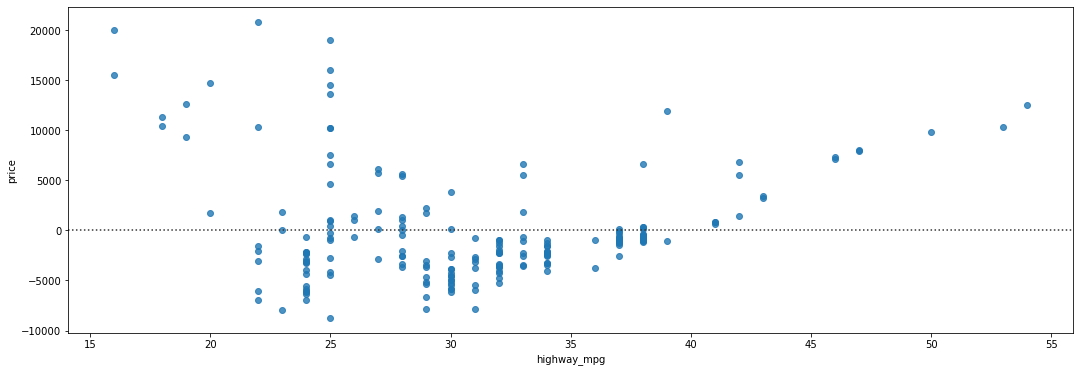

In [189]:
for col in numCols2:
    plt.figure(figsize=(18,6))
    sns.residplot(x=col, y=Y, data=mdf)
    plt.show()

In [190]:
lm.fit(X,Y)

LinearRegression()

In [191]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[13105.61870353],
       [13105.61870353],
       [19445.69743191],
       [12743.52866742],
       [15822.38323418]])

In [192]:
lm.intercept_

array([-57636.09387533])

In [193]:
lm.coef_

array([[-1.57142786e+02,  6.87683088e+02,  1.48691859e+04,
         1.04024593e+02,  2.33594410e+02,  4.73499655e+04,
         2.76836422e+00,  8.40456597e+01, -1.32497023e+03,
         2.95296179e+01,  6.66179726e+01, -9.37705315e+00]])

C:\Users\17018\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\17018\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual vs Fitted Values for Price')

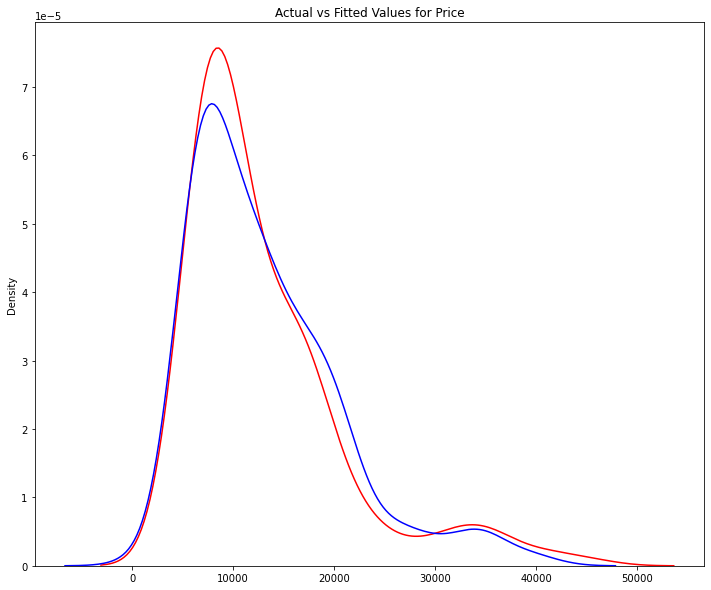

In [194]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted Values for Price')

In [195]:
mean_squared_error(Y,Yhat)

7615022.257493194

In [196]:
lm.score(X,Y)

0.8766091579940145

### Using PolynomialFeatures object of degree 2:

In [197]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [198]:
X_pr=pr.fit_transform(X)

In [199]:
X.shape

(196, 12)

In the original data, there are 196 samples and 12 features.

In [200]:
X_pr.shape

(196, 91)

After transformation, there are 196 samples and 91 features.

#### Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [201]:
# We create the pipeline by creating a list of tuples including the name of the model or estimator 
# and its corresponding constructor.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [202]:
# We input the list as an argument to the pipeline constructor:

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type X to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously.

In [203]:
X = X.astype(float)
pipe.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [204]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously
Ypipe=pipe.predict(X)
Ypipe[0:4]

array([[14663.90820312],
       [14663.90820312],
       [16271.90820312],
       [14497.90820312]])

In [205]:
pipe.score(X,Y)

0.9805937139043529

In [206]:
mean_squared_error(Y,Ypipe)

1197652.0959834664

C:\Users\17018\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\17018\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual vs Fitted Values for Price')

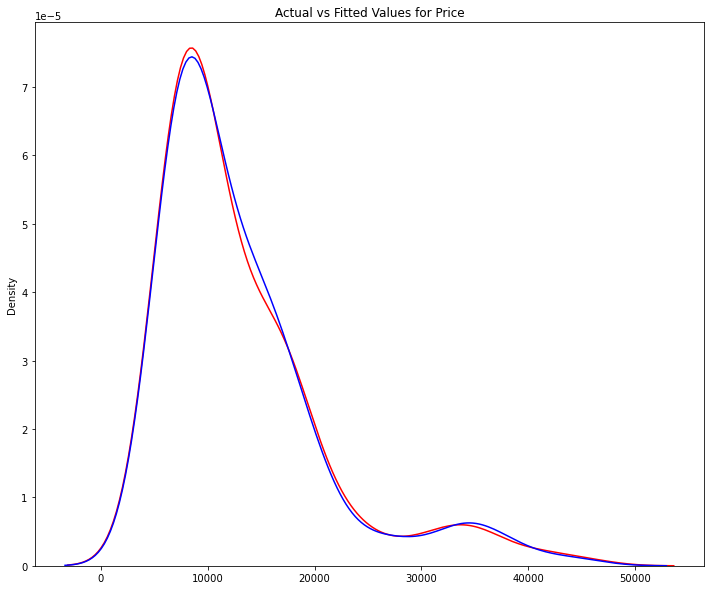

In [207]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Ypipe, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted Values for Price')

### Decision Making: Determining a Good Model Fit Between:
* Multiple Linear Regression(MLR)
* Using PolynomialFeatures object of degree 2

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Multiple Linear Regression: Using make,drive_wheels, engine_location, wheel_base, length, width, curb-weight, num_of_cylinders, engine_size,bore, horsepower, city_mpg and highway_mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.8766091579940145</li>
    <li>MSE: 7.61 x10^6</li>
</ul>
</p>

<p>PolynomalFeatures with Pipeline Constructor object of Degree 2: Using make,drive_wheels, engine_location, wheel_base, length, width, curb-weight, num_of_cylinders, engine_size,bore, horsepower, city_mpg and highway_mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.9805937139043529</li>
    <li>MSE: 1.2 x10^6</li>
</ul>
</p>



<h2>Conclusion</h2>

<p>Comparing these two models, we conclude that <b>the PolynomialFeatures object of degree 2 model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>